In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import keys

import gmaps
import gmaps.datasets

GOOGLE_API = keys.GMAP_API
gmaps.configure(api_key=GOOGLE_API)

data_path = "data/"
citi_data1 = "2013-07 - Citi Bike trip data.csv"

In [2]:
citi_df = pd.read_csv(data_path+citi_data1)

In [3]:
citi_df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [4]:
citi_df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,8.434160e+05,843416.000000,843416.000000,843416.000000,843416.000000,843416.000000,843416.000000,843416.000000,843416.000000
mean,9.981007e+02,428.445424,40.733611,-73.991241,429.437272,40.733218,-73.991257,17615.627889,0.978747
std,7.146790e+03,313.478523,0.020584,0.012760,320.087328,0.020652,0.012888,1703.568990,0.626986
min,6.000000e+01,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,4.440000e+02,305.000000,40.718939,-74.001547,304.000000,40.717821,-74.001768,16136.000000,1.000000
50%,7.290000e+02,401.000000,40.735324,-73.990931,399.000000,40.734927,-73.990931,17627.000000,1.000000
75%,1.202000e+03,482.000000,40.750200,-73.981923,480.000000,40.749718,-73.981923,19088.000000,1.000000
max,6.250750e+06,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,20626.000000,2.000000


In [5]:
#Clean Data

citi_df["starttime"] = pd.to_datetime(citi_df["starttime"], format="%Y-%m-%d %H:%M:%S")
citi_df["stoptime"] = pd.to_datetime(citi_df["stoptime"], format="%Y-%m-%d %H:%M:%S")

In [6]:
citi_df[["tripduration"]]

,tripduration
0,634
1,1547
2,178
3,1580
4,757
5,861
6,550
7,288
8,766
9,773


(array([  8.43415000e+05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  6.00000000e+01,   1.25019800e+06,   2.50033600e+06,
          3.75047400e+06,   5.00061200e+06,   6.25075000e+06]),
 <a list of 5 Patch objects>)

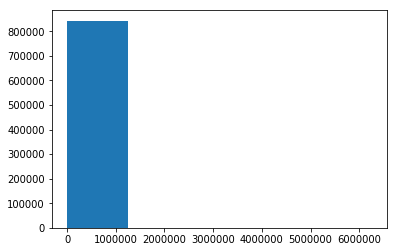

In [7]:
plt.hist(citi_df["tripduration"], bins=5)

In [8]:
citi_df[citi_df["tripduration"] < 2700]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1
5,861,2013-07-01 00:01:23,2013-07-01 00:15:44,511,E 14 St & Avenue B,40.729387,-73.977724,454,E 51 St & 1 Ave,40.754557,-73.965930,16223,Subscriber,1988,1
6,550,2013-07-01 00:01:59,2013-07-01 00:11:09,293,Lafayette St & E 8 St,40.730287,-73.990765,394,E 9 St & Avenue C,40.725213,-73.977688,16746,Customer,\N,0
7,288,2013-07-01 00:02:16,2013-07-01 00:07:04,224,Spruce St & Nassau St,40.711464,-74.005524,376,John St & William St,40.708621,-74.007222,16062,Subscriber,1985,2
8,766,2013-07-01 00:02:16,2013-07-01 00:15:02,432,E 7 St & Avenue A,40.726218,-73.983799,336,Sullivan St & Washington Sq,40.730477,-73.999061,17963,Subscriber,1980,2
9,773,2013-07-01 00:02:23,2013-07-01 00:15:16,173,Broadway & W 49 St,40.760647,-73.984427,479,9 Ave & W 45 St,40.760193,-73.991255,19365,Subscriber,1989,1


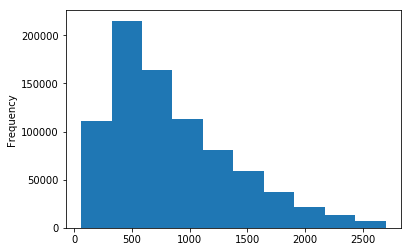

In [9]:
citi_df[citi_df["tripduration"] < 2700]["tripduration"].plot(kind="hist")

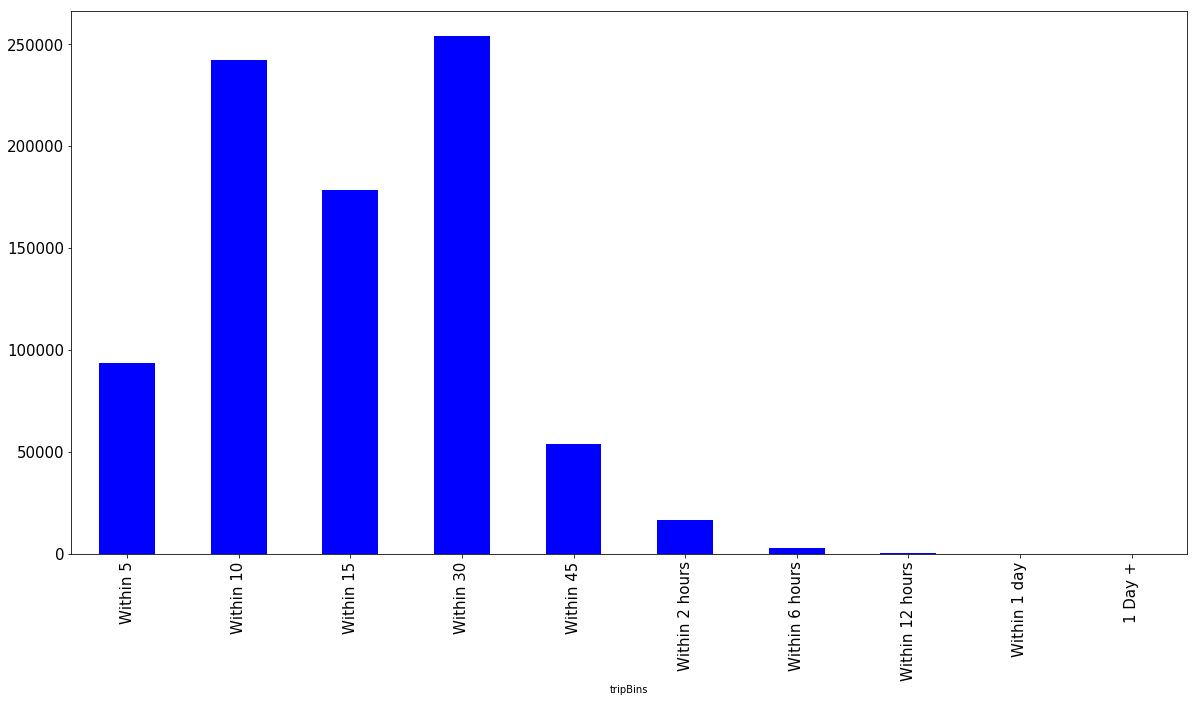

In [10]:
bins = [0, 300, 600, 900, 1800, 2700, 7200, 21600, 43200, 86400, 360000000]
labels =["Within 5", "Within 10", "Within 15", "Within 30", "Within 45", "Within 2 hours", 
         "Within 6 hours", "Within 12 hours", "Within 1 day", "1 Day +"]

citi_df["tripBins"] = pd.cut(citi_df['tripduration'], bins=bins, labels=labels)

citi_df[["tripBins"]].groupby("tripBins").size().plot(kind="bar", figsize=(20,10), fontsize=15, color="blue")

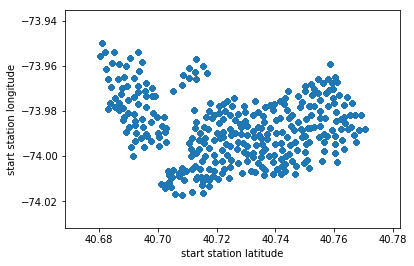

In [11]:
citi_df[["start station latitude", "start station longitude"]].plot(kind="scatter", x="start station latitude", y="start station longitude")
plt.show()

In [12]:
citi_df["startDate"] = citi_df["starttime"].dt.date
citi_df["stopDate"] = citi_df["stoptime"].dt.date


citi_user_df = citi_df[["usertype", "startDate", "start station id"]]

In [13]:
citi_user_group = citi_user_df.groupby(["startDate","usertype"])

In [14]:
user_type_data = citi_user_group.count()

In [15]:
user_type_data

start station id
startDate  usertype                    
2013-07-01 Customer                2734
           Subscriber             13916
2013-07-02 Customer                4070
           Subscriber             18675
2013-07-03 Customer                4152
           Subscriber             17712
2013-07-04 Customer               10773
           Subscriber             11553
2013-07-05 Customer                8175
           Subscriber             13667
2013-07-06 Customer                8964
           Subscriber             11503
2013-07-07 Customer                7867
           Subscriber             12610
2013-07-08 Customer                4118
           Subscriber             17497
2013-07-09 Customer                4285
           Subscriber             22356
2013-07-10 Customer                4023
           Subscriber             21709
2013-07-11 Customer                3688
           Subscriber             20729
2013-07-12 Customer                2758
           Subscriber             16248
2013-07-13 Customer                7879
           Subscriber             18240
2013-07-14 Customer                9863
           Subscriber             19424
2013-07-15 Customer                4288
           Subscriber             23781
...                                 ...
2013-07-17 Customer                4127
           Subscriber             26423
2013-07-18 Customer                3578
           Subscriber             25291
2013-07-19 Customer                3751
           Subscriber             22840
2013-07-20 Customer                7572
           Subscriber             17706
2013-07-21 Customer                9732
           Subscriber             20565
2013-07-22 Customer                3557
           Subscriber             22422
2013-07-23 Customer                3991
           Subscriber             28385
2013-07-24 Customer                4716
           Subscriber             30555
2013-07-25 Customer                3656
           Subscriber             27428
2013-07-26 Customer                5490
           Subscriber             29044
2013-07-27 Customer               10973
           Subscriber             21497
2013-07-28 Customer                6879
           Subscriber             16629
2013-07-29 Customer                5237
           Subscriber             29678
2013-07-30 Customer                5095
           Subscriber             32239
2013-07-31 Customer                4964
           Subscriber             32297

[62 rows x 1 columns]

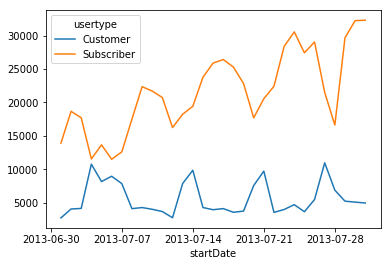

In [16]:
user_type_data["start station id"].unstack().plot()

In [17]:
start_loc = np.array(list(zip(citi_df["start station latitude"], citi_df["start station longitude"])))

In [18]:
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(start_loc))
fig

A Jupyter Widget

In [19]:
end_loc = np.array(list(zip(citi_df["end station latitude"], citi_df["end station longitude"])))

In [20]:
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(end_loc))
fig

A Jupyter Widget

In [21]:
citi_df.groupby("start station id").size().sort_values(ascending=False)

start station id
459     8049
497     7814
426     7387
519     7290
285     7167
521     7048
293     6979
327     6829
499     6294
490     6259
363     6162
444     6090
477     5817
2006    5789
368     5738
151     5655
402     5420
281     5340
387     5290
457     5202
358     5046
79      5034
347     5008
382     4914
435     4897
492     4848
518     4660
128     4638
318     4526
466     4514
        ... 
365      572
258      566
407      562
278      552
279      520
2009     510
397      508
339      505
437      491
343      488
354      477
275      466
218      441
144      417
421      399
245      396
298      392
344      363
2023     363
409      335
392      333
436      331
289      329
372      295
443      294
431      225
321      175
2001     162
119      117
2005     116
Length: 329, dtype: int64

In [22]:
citi_df.groupby("end station id").size().sort_values(ascending=False)

end station id
497     8305
459     7848
426     7626
285     7052
293     6926
327     6832
521     6766
363     6402
499     6368
368     6044
444     6010
519     5920
2006    5811
151     5778
402     5591
281     5505
477     5257
387     5170
358     5160
79      5131
347     5099
382     4972
435     4880
457     4792
128     4770
490     4708
404     4662
518     4623
466     4466
284     4446
        ... 
399      597
354      593
278      558
218      545
279      539
339      536
343      523
397      515
437      510
258      504
2009     477
298      472
275      443
392      408
344      396
144      370
421      361
443      359
407      357
245      340
436      340
2023     338
409      329
372      326
289      298
431      235
2001     201
321      169
2005     136
119      127
Length: 329, dtype: int64

In [23]:
df_sub = citi_df[citi_df["usertype"] == "Subscriber"][["birth year", "usertype"]]

df_sub["birth year"] = pd.to_numeric(df_sub["birth year"])

In [24]:
sorted(df_sub["birth year"].unique())

[1899,
 1900,
 1901,
 1910,
 1913,
 1920,
 1921,
 1922,
 1924,
 1926,
 1927,
 1930,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997]

In [51]:
curr_year = 2013

df_year = pd.DataFrame()
df_year["Age"] = curr_year - df_sub[["birth year"]]

In [ ]:
df_year[["Age"]].plot(kind="hist")

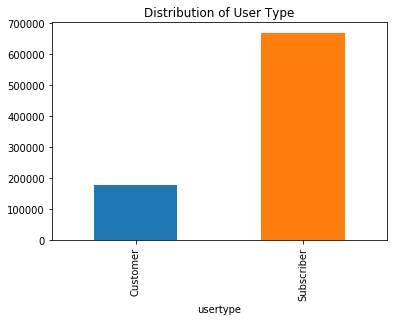

In [27]:
citi_df[["usertype"]].groupby("usertype").size().plot(kind="bar", title="Distribution of User Type")

In [28]:
citi_df["bikeid"].count()

843416

In [29]:
len(citi_df["bikeid"].unique())

5461

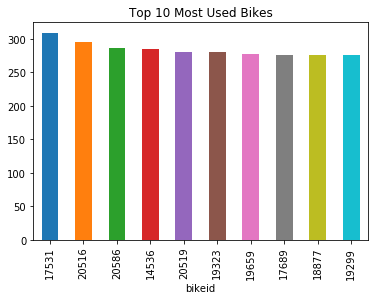

In [30]:
citi_df[["bikeid"]].groupby("bikeid").size().nlargest(10).plot(kind="bar", title="Top 10 Most Used Bikes")

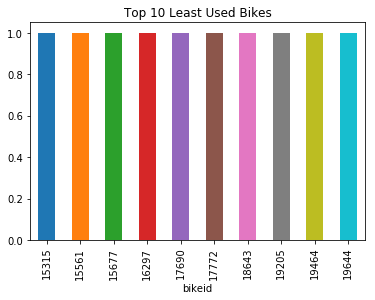

In [31]:
citi_df[["bikeid"]].groupby("bikeid").size().nsmallest(10).plot(kind="bar", title="Top 10 Least Used Bikes")

In [32]:
citi_df[["bikeid"]].groupby("bikeid").size().mean()

154.44350851492402

In [33]:
gender_dict = {0: "N/A", 1: "Male", 2:"Female"}

citi_gender_df = citi_df.replace({"gender":gender_dict})

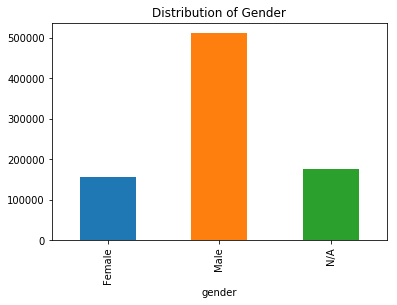

In [34]:
citi_gender_df[["gender"]].groupby("gender").size().plot(kind="bar", title="Distribution of Gender")

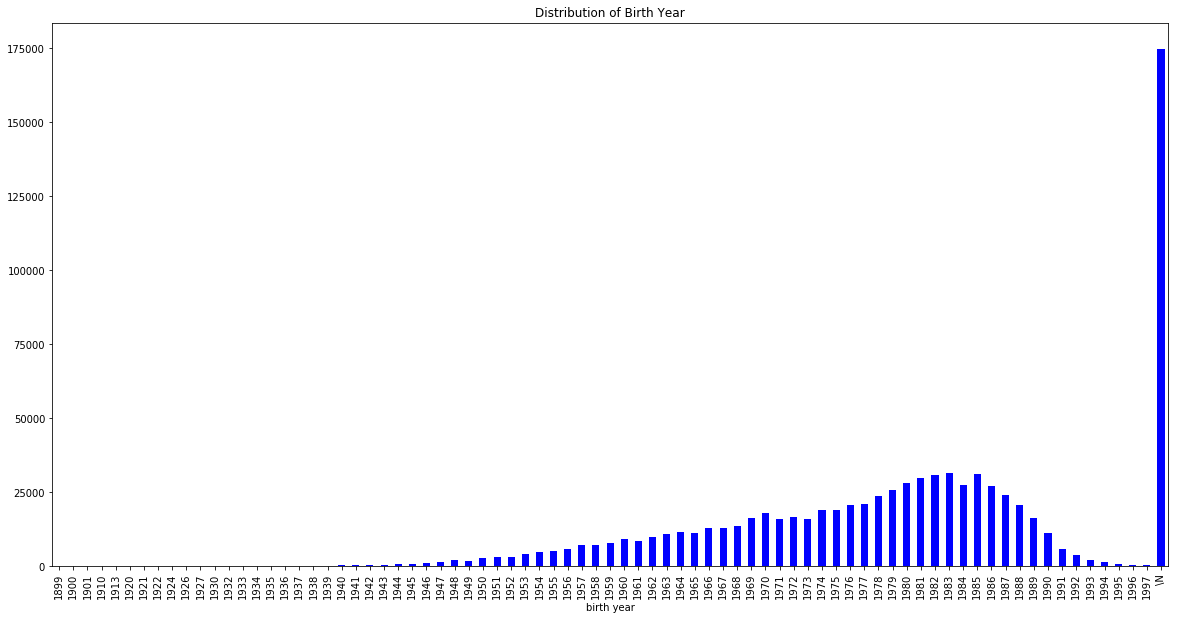

In [50]:
citi_df[["birth year"]].groupby("birth year").size().plot(kind="bar", title="Distribution of Birth Year", figsize=(20,10), color="blue")

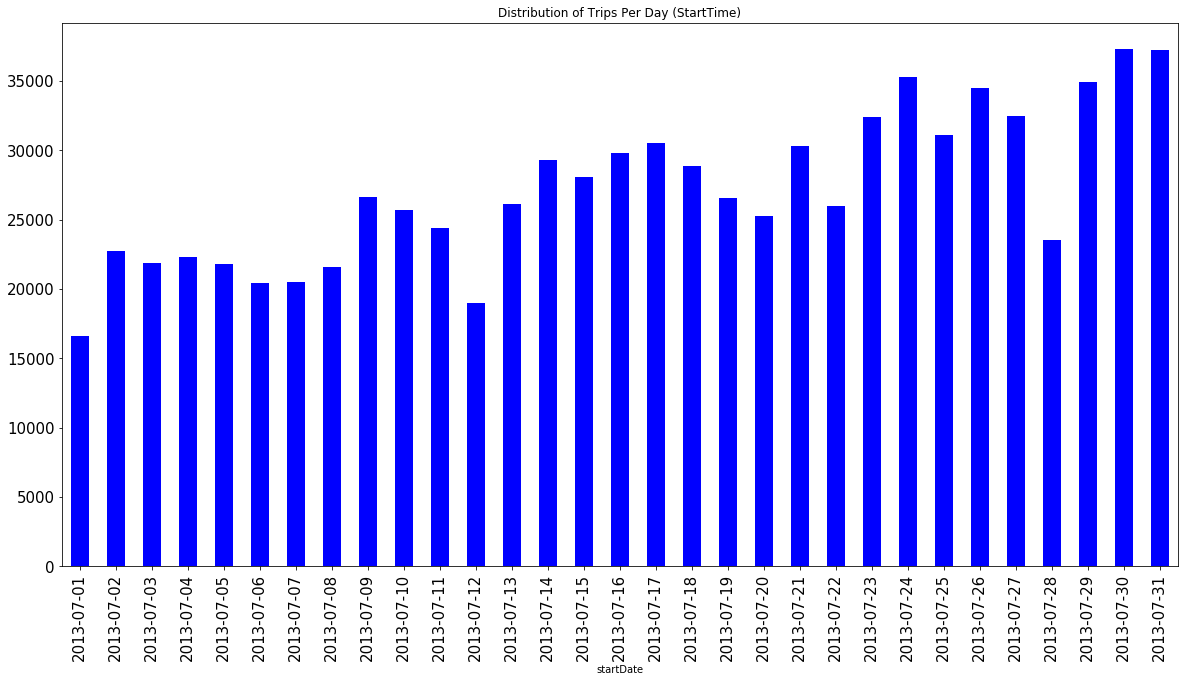

In [36]:
citi_df[["startDate"]].groupby("startDate").size().plot(kind="bar", title="Distribution of Trips Per Day (StartTime)", figsize=(20,10), fontsize=15, color="blue")

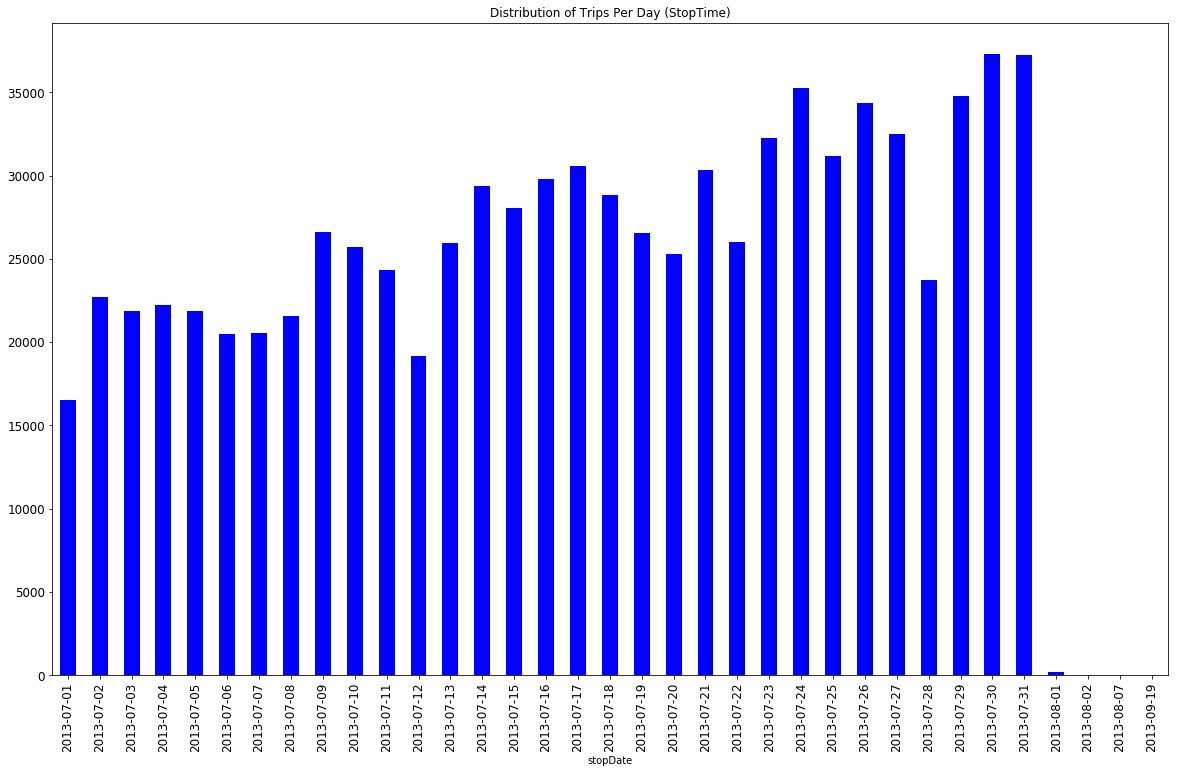

In [45]:
citi_df[["stopDate"]].groupby("stopDate").size().plot(kind="bar", title="Distribution of Trips Per Day (StopTime)", figsize=(20,12), fontsize=12, color="blue")

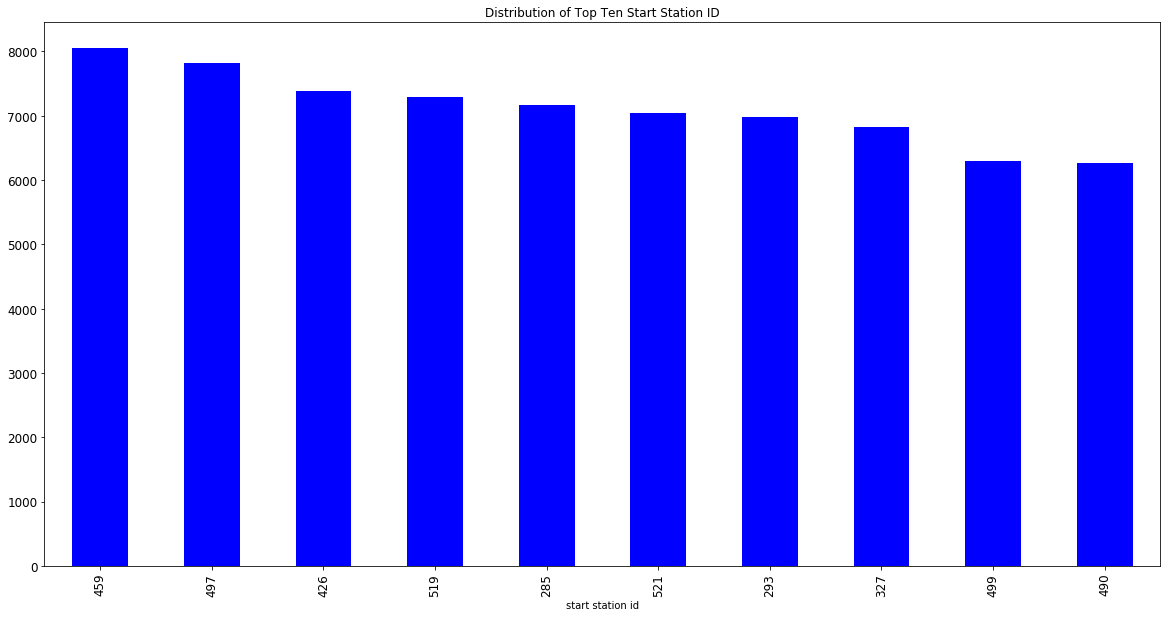

In [46]:
citi_df[["start station id"]].groupby("start station id").size().nlargest(10).plot(kind="bar", title="Distribution of Top Ten Start Station ID", figsize=(20,10), fontsize=12, color="blue")

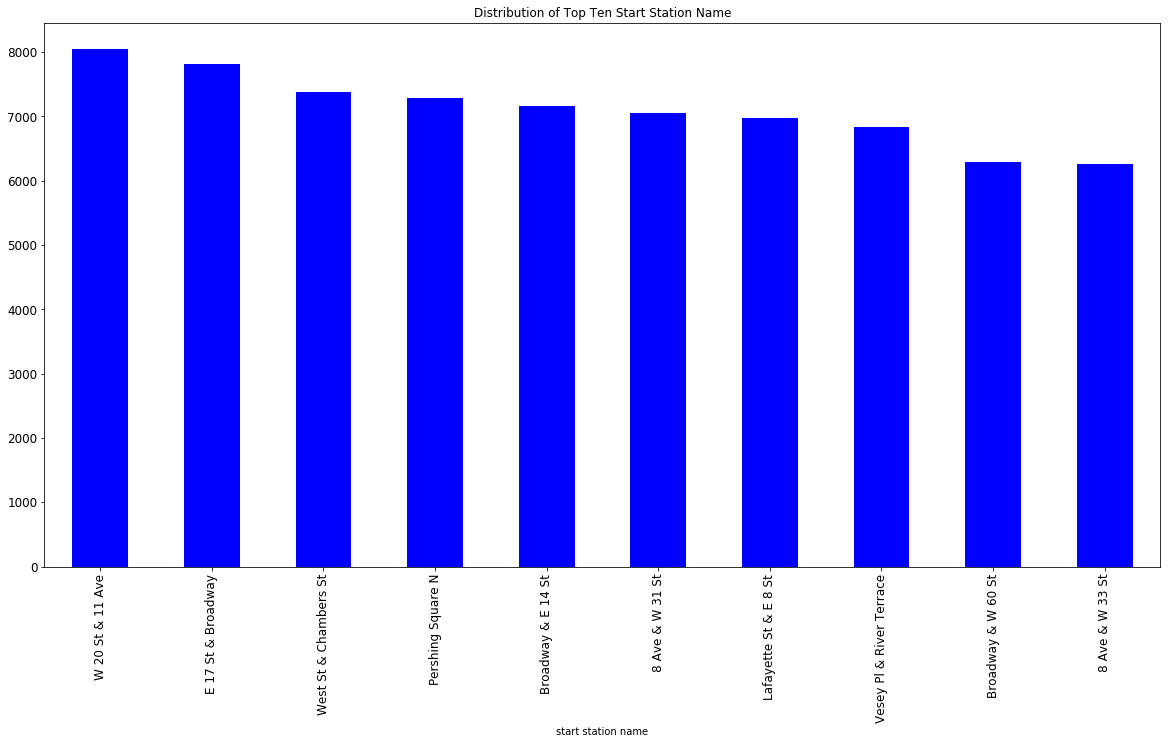

In [47]:
citi_df[["start station name"]].groupby("start station name").size().nlargest(10).plot(kind="bar", title="Distribution of Top Ten Start Station Name", figsize=(20,10), fontsize=12, color="blue")

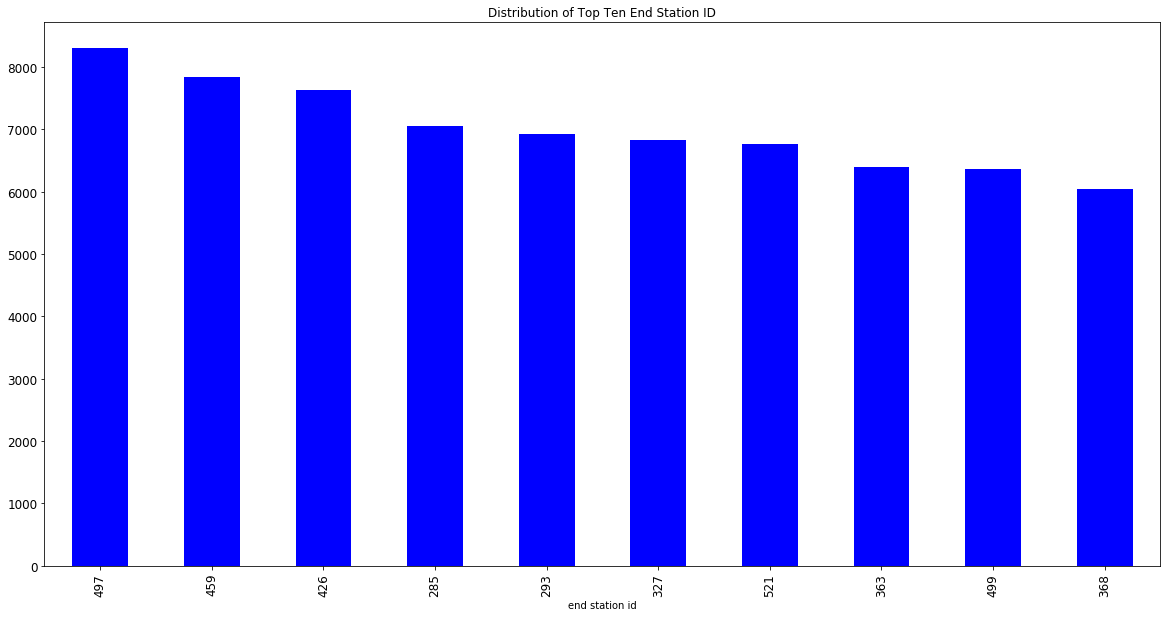

In [48]:
citi_df[["end station id"]].groupby("end station id").size().nlargest(10).plot(kind="bar", title="Distribution of Top Ten End Station ID", figsize=(20,10), fontsize=12, color="blue")

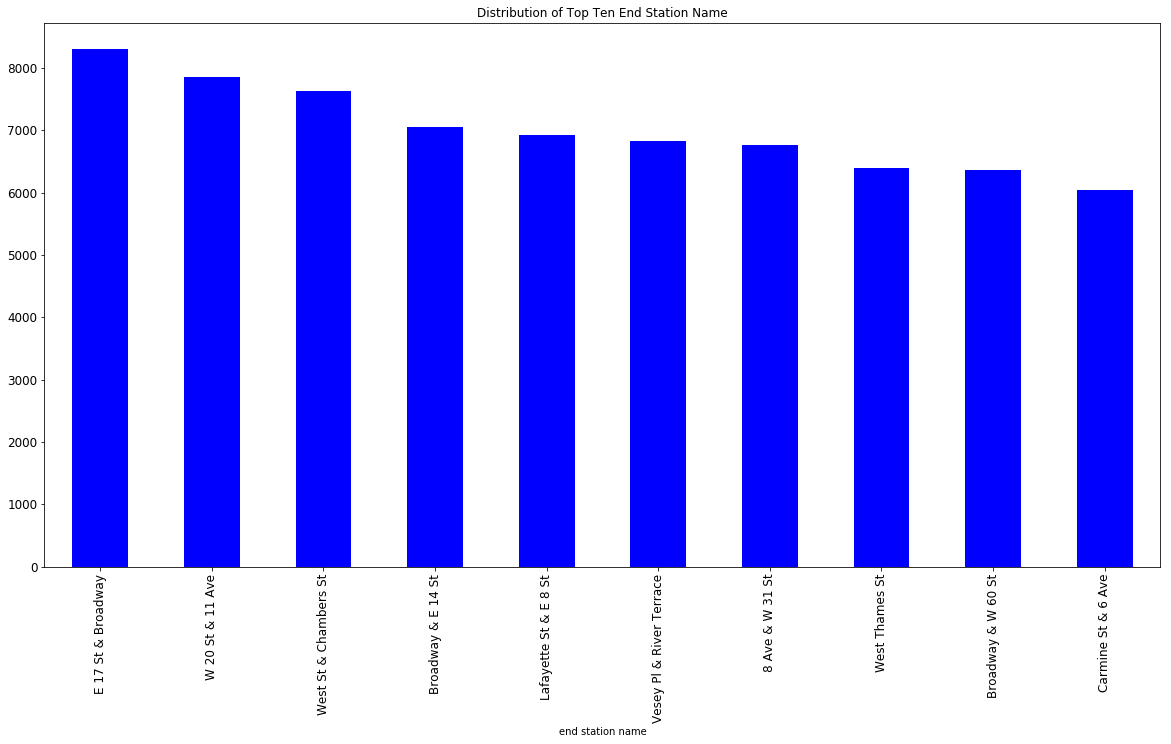

In [49]:
citi_df[["end station name"]].groupby("end station name").size().nlargest(10).plot(kind="bar", title="Distribution of Top Ten End Station Name", figsize=(20,10), fontsize=12, color="blue" )